Please enter the term: sbrt
If you want to search the term in all content, press 1; if you want to search the term appearing in article titles, press 2; if you want to search for the term appearing in abstracts, press 3; if you want to search for the term appearing in article titles, abstracts, and keywords (Recommended), press 4: 4
If you don't want to apply the search filter, press 1; If you prefer to limit your search by only full articles, press 2; If you prefer to limit your search by only abstracts, press 3: 3
This is the raw information: {'term': 'sbrt', 'link_1': 'https://www.redjournal.org/action/doSearch?occurrences=articleTitleAbstractKeywords&searchText=sbrt&code=rob-site&searchType=quick&searchScope=fullSite&rows=20&journalCode=rob&startPage=', 'link_2': 'https://www.redjournal.org/action/doSearch?occurrences=articleTitleAbstractKeywords&searchText=sbrt&searchType=quick&searchScope=fullSite&rows=20&code=rob-site&artLblfield=Full+length+article&filterModify=true&startPage='

Second case of raw data: ['2018-03', '2018-01', '2016-09', '2017-06', '2018-01', '2019-03', '2019-01', '2017-04', '2018-03', '2018-09', '2018-01', '2017-09', '2017-12', '2016-07', '2016-11', '2018-01', '2018-05', '2013-09', '2009-07', '2009-03', '2016-12', '2018-08', '2018-11', '2014-07', '2008-11', '2018-04', '2017-08', '2008-04', '2011-04', '2011-06', '2016-05', '2018-02', '2017-10', '2016-08', '2017-11', '2015-10', '2014-07', '2018-11', '2011-01', '2010-04', '2017-03', '2018-02', '2017-07', '2018-09', '2019-01', '2015-03', '2010-10', '2011-10', '2008-04', '2011-12', '2017-01', '2016-01', '2018-04', '2017-09', '2017-10', '2018-07', '2018-06', '2017-04', '2017-12', '2018-06', '2015-11', '2009-05', '2011-05', '2010-10', '2014-11', '2013-10', '2009-02', '2009-11', '2012-04', '2012-06', '2016-09', '2011-10', '2010-12', '2014-04', '2012-04', '2017-01', '2017-08', '2006-11', '2015-10', '2016-01', '2017-01', '2016-02', '2016-01', '2016-01', '2018-02', '2018-07', '2016-04', '2018-07', '2014-

Would you like to search for another term? (yes or no): no
This is the raw data: [['2018-02', '2018-09', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '2018-11', '201

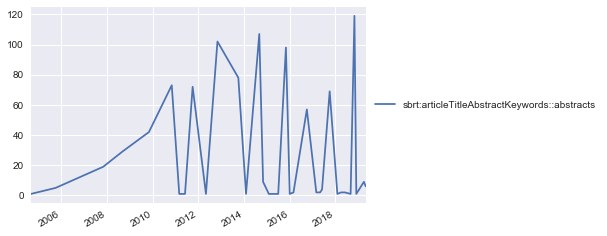

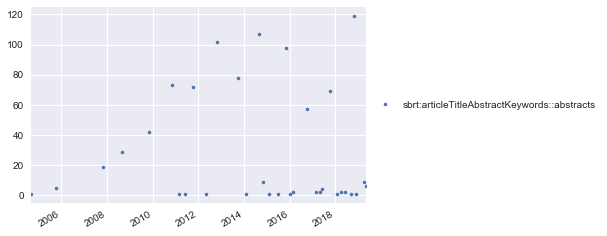

In [1]:
##Ideas for future updates: 
# 1. Filter by most reputable authors (Erdos' problem in COMAP)
# 2. Normalize the line and build regression data.
# 3. A GUI
# 4. Filter by the most cited papers?? (combine it with 1)
# 5. Branch out to different journals.







# For data cleaning graphing
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn
import datetime
import json

# Web scraping packages

from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

# Time parser
from dateutil.parser import parse


# Plotting the data
import matplotlib.pyplot as plt
%matplotlib inline



########################################MAIN PROGRAM##################################################
def cleaner(lis):

    for p in range(len(lis)):
        if 'Published online: ' in lis[p]:
            repl = lis[p].lstrip('Published online:')
            lis[p] = repl
            
        elif 'Published in issue: ' in lis[p]:
            repl = lis[p].lstrip('Published in issue:')
            lis[p] = repl  
    return lis


def formatted_time(time_lis):
    
    formatted_list = []
    
    for i in time_lis:
        try:
            date_object = parse(i)
            new_format = date_object.strftime('%Y-%m')
            formatted_list.append(new_format)
        except:
            continue
    
    return formatted_list
    
def engine(url):
    
    new_url = url
    i = 0
    lis1 = [] # That's where the raw dates are stored
    
    # Parses through the pages
    while True:
        new_url = new_url + str(i) # Switches pages (i of 0 returns the first page)
        r = requests.get(new_url, headers={'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}, timeout=15) # requests the site
        soup = BeautifulSoup(r.text, "lxml") # lxml to parse webpage
        # Checks the conditions by extracting the article
        
        x = soup.findAll('div', {'class':'noResultsTab'})
        x = str(x)
        start_class = x.find('<div class')
        end_class = x.find('>', start_class+1)
        last_class = x.find('</') #last instance of </
        extract = x[end_class+1:last_class]
        
        if 'There are no "Articles" results to show with the current filter(s) applied.' in extract:
            break
            
        else: # Appends raw text to the list
            
            for z in soup.findAll('div', {'class':'published-online'}):
                lis1.append(str(z.get_text()))
            # Resets the url to the original
            new_url = url
            i += 1

     
    lis2 = cleaner(lis1)
    organized_list = formatted_time(lis2)
    
    return organized_list
    
    
    # Creating an appropriate format
    
def search_options(word):
    
    dossier = {}
    link_last_part = ''
    # Enter search options for the terms
    # All content | Article Title, Abstr, ... | Authors ... | Article Title | Abstract
    
    search = int(input('If you want to search the term in all content, press 1; if you want to search the term appearing in article titles, press 2; if you want to search for the term appearing in abstracts, press 3; if you want to search for the term appearing in article titles, abstracts, and keywords (Recommended), press 4: '))
    
    while search > 4:
        search = str(input('If you want to search the term in all content, press 1; if you want to search the term appearing in article titles, press 2; if you want to search for the term appearing in abstracts, press 3; if you want to search for the term appearing in article titles, abstracts, and keywords (Recommended), press 4: '))
    
    search_options = {1: 'all', 2: 'articleTitle', 3: 'abstract', 4: 'articleTitleAbstractKeywords'}
    ######################################################################################################
    filtering = int(input("If you don't want to apply the search filter, press 1; If you prefer to limit your search by only full articles, press 2; If you prefer to limit your search by only abstracts, press 3: "))
    while filtering > 3:
        filtering = int(input("If you don't want to apply the search filter (the results will be obtained from abstracts AND full articles), press 1; \
                           If you prefer to limit your search by only full articles, press 2; \
                           If you prefer to limit your search by only abstracts, press 3: "))
    
    filter_options = {1:['&code=rob-site&searchType=quick&searchScope=fullSite&rows=20&journalCode=rob', 'abstracts+full articles'], 2:['&searchType=quick&searchScope=fullSite&rows=20&code=rob-site&artLblfield=Full+length+article&filterModify=true', 'full articles'], 3: ['', 'abstracts']}
        
    if (filtering == 1) or (filtering == 2):
        link = 'https://www.redjournal.org/action/doSearch?occurrences='+ search_options[search] + '&searchText=' + word + filter_options[filtering][0] + '&startPage=' 
        dossier['term'] = word
        dossier['link'] = link
        dossier['filter'] = filter_options[filtering][1]
        dossier['search parameter'] = search_options[search]
        return dossier
    
    elif filtering == 3:
        union_link = 'https://www.redjournal.org/action/doSearch?occurrences='+ search_options[search] + '&searchText=' + word + filter_options[1][0] + '&startPage='
        only_full_articles_link = 'https://www.redjournal.org/action/doSearch?occurrences='+ search_options[search] + '&searchText=' + word + filter_options[2][0] + '&startPage='
        dossier['term'] = word
        dossier['link_1'] = union_link
        dossier['link_2'] = only_full_articles_link
        dossier['filter'] = filter_options[filtering][1]
        dossier['search parameter'] = search_options[search]
        return dossier
    

def is_right_link(url):
    r = requests.get(url, headers={'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}, timeout=15) # requests the site
    soup = BeautifulSoup(r.text, "lxml")
    
    flag = True # Assumes that the link is correct

    soup = BeautifulSoup(r.text, "lxml") # lxml to parse webpage
    find_error = soup.findAll('p')
    
    # wrong filt
    wrong_filter = soup.findAll('div', {'class':'searchResults'})
    wrong_result = soup.findAll('div', {'class': 'noResults'})
    

    
    if len(wrong_filter) == 0:
        deciding_parsing_parameter = wrong_result
    elif len(wrong_result) == 0:
        deciding_parsing_parameter = wrong_filter
        
    for j in find_error:
        error_text = j.get_text()
        for i in deciding_parsing_parameter:
            text_in_class = i.get_text()
            if error_text in text_in_class:
                flag = False
    
    return flag

def dictionary_constructor(lis_of_lis, terms):
    
    diction = {}
    
    for t in range(len(terms)):
        diction[terms[t]] = np.array(lis_of_lis[t])
        
    
    return diction
    
def dictionary_test(dt):
    
    for key, value in dt.items():
        print(key, ':', len(value), 'results')

        
def abstract_extractor(union, full_articles):

    
    print('union length is:', len(union))
    print('full articles length is:', len(full_articles))
    
    
    diction_union = {}
    diction_full_articles = {}
    
    abstract_list = []
    
    # Counts the number of the item at an index in both lists and appends the terms and the frequency of its appearance in the respective dictionaries
    for u in union:
        union_count = union.count(u)
        diction_union[u] = union_count
        
        full_articles_count = full_articles.count(u)
        diction_full_articles[u] = full_articles_count
        
            
    for k, values in diction_union.items():
        if diction_union[k] > diction_full_articles[k]:
            counter = diction_union[k] - diction_full_articles[k]
            for i in range(counter):
                abstract_list.append(k)
        
    return abstract_list
   
    
def main():

    # Terms for naming the columns and list of lists for columns themselves
    terms_storage = []
    data_lists = []
    
    choice = ''
    choice = choice.lower()
    choice = choice.replace(" ", "")
    
    while choice != 'no':
        term = input('Please enter the term: ')
        term = term.replace(" ", "+")
        search_information = search_options(term)
        # Check if the right link is true
        print('This is the raw information:', search_information)
        if len(search_information) == 4:
            
            if is_right_link(search_information['link']):
                # Extracting the data
                raw_data = engine(search_information['link'])
                print('This is the raw data:', raw_data)
                data_lists.append(raw_data)
            # # # # # # # # # # # # # # # Extracting the terms
            
                term = search_information['term'].replace("+", " ")
                filt = search_information['filter']
                search_par = search_information['search parameter']
                updated_term = term + ":" + search_par + "::" + filt
                terms_storage.append(updated_term)
            else:
                print('No results with the current filter were found, please try again')
                
        elif len(search_information) == 5: # Only for abstracts
            if is_right_link(search_information['link_1']) and is_right_link(search_information['link_2']):
                
                first_data = engine(search_information['link_1'])
                print('First case of raw data:', first_data)
                second_data = engine(search_information['link_2'])
                print('Second case of raw data:', second_data)
                abstract_data = abstract_extractor(first_data, second_data)
                print('This is abstract data:', abstract_data)
                data_lists.append(abstract_data)
            # # # # # # # # # # # # # # # 
                
                term = search_information['term'].replace("+", " ")
                filt = search_information['filter']
                search_par = search_information['search parameter']
                updated_term = term + ":" + search_par + "::" + filt
                terms_storage.append(updated_term)
            else:
                print('One or more of the filters appear to find an error or no results for the entered term. Please enter another filter for the term.')
        choice = input("Would you like to search for another term? (yes or no): ").lower().replace(" " , "")
    
    # Connect the storage of terms to the list of lists of time data
    print('This is the raw data:', data_lists)
    print('Your terms entered:', terms_storage)
    pre_table_dict = dictionary_constructor(data_lists, terms_storage)
    print(pre_table_dict)
    dictionary_test(pre_table_dict)
    
            
    # Convert the dictionary to a dataframe with 
    df = pd.DataFrame.from_dict(pre_table_dict, orient = 'index')   
    df = df.transpose()
    df = df.apply(pd.Series.value_counts)
    df.index = pd.to_datetime(df.index, format='%Y-%m')
    
    if len(pre_table_dict) == 1:
        df.plot();
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        df.plot(style = ['.'])
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


    else:
        # Graping the terms altogether
        style_list = []
        for tr in range(len(terms_storage)):
            style_list.append('.')
        # Graph functions    
        df.plot();
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        df.plot(style = style_list)
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        length = input('Please enter the length of your plot (in in.): ')
        width = input('Please enter the width of your plot (in in.): ')

        while (not length.isnumeric()) or (not width.isnumeric()):
            length = input('Please enter the length of your plot (in in.): ')
            width = input('Please enter the width of your plot (in in.): ')
        # Using matplotlib to graph by individual terms
        for j in range(len(terms_storage)):
            fig1, fig1_axes = plt.subplots(ncols=2, figsize=(int(length), int(width)), nrows=1, sharex=True, sharey=True)
            fig1_axes[0].plot(df.index, df[terms_storage[j]])
            fig1_axes[1].scatter(df.index, df[terms_storage[j]], marker = '.')
            fig1_axes[0].set_title(terms_storage[j])
            fig1_axes[1].set_title(terms_storage[j])
            
main()